## Food Demand Forecasting

#### Predict the num_of_orders for next 10  weeks (146-155)

In [3]:
#Pratham kr Verma
#Food Demand Forecasting

#Inference

#1.The num_orders is our target variable.It is right skewed.So,log_transformed it to reduce skewness
#2.Removing outliers from target varibale increased the RMLSE.
#3.Splitting is done on basis of week as we need to predcit for last 10 weeks
#4.New features has been created from existing features
#5.Categorical columns has been encoded
#6.Co-linear and constant features have been removed
#7.Hypertuning is done with GridSearch
#8.Gradient Boosting Models gave less RMLSE as compared to Tree Based and Linear Models
#9.LGBM gave the least RMLSE.So,prediction on test is done with LGBM Regressor Model


In [4]:
#importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn import preprocessing
from lightgbm import LGBMRegressor
warnings.filterwarnings('ignore')



In [5]:
#importing train data
train_df1=pd.read_csv("train.csv")
ful_df2=pd.read_csv("fulfilment_center_info.csv")
meal_df3=pd.read_csv("meal_info.csv")

In [6]:
#merging fulfilment_center_info dataframe with train dataframe
df4=pd.merge(train_df1, ful_df2, on = "center_id", how = "inner")
df4

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68,473,77,TYPE_A,4.5
456544,1062036,145,61,2304,482.09,482.09,0,0,42,473,77,TYPE_A,4.5
456545,1110849,145,61,2664,237.68,321.07,0,0,501,473,77,TYPE_A,4.5
456546,1147725,145,61,2569,243.50,313.34,0,0,729,473,77,TYPE_A,4.5


In [7]:
#merging meal_id dataframe with train dataframe
main_train=pd.merge(df4, meal_df3, on = "meal_id", how = "inner")
main_train

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1437396,141,61,2104,583.03,630.53,0,1,13,473,77,TYPE_A,4.5,Fish,Continental
456544,1060716,142,61,2104,581.03,582.03,0,0,42,473,77,TYPE_A,4.5,Fish,Continental
456545,1029231,143,61,2104,583.03,581.03,0,0,40,473,77,TYPE_A,4.5,Fish,Continental
456546,1141147,144,61,2104,582.03,581.03,0,0,53,473,77,TYPE_A,4.5,Fish,Continental


# preprocessing

In [8]:
#checking statistical data
main_train.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000,456548.000000,456548.000000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760,601.553399,56.614566,4.083590
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798,66.195914,17.641306,1.091686
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000,456.000000,23.000000,0.900000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000,553.000000,34.000000,3.600000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000,596.000000,56.000000,4.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000,651.000000,77.000000,4.500000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000,713.000000,93.000000,7.000000


In [9]:
#num_orders column i.e. target coumn has max value much higher than the 75% and mean.So,it must have outliers

#### num_orders column i.e. target coumn has max value much higher than the 75% and mean.So,it must have outliers

In [10]:
#checking data types and unique data
main_train.info()
main_train.nunique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   city_code              456548 non-null  int64  
 10  region_code            456548 non-null  int64  
 11  center_type            456548 non-null  object 
 12  op_area                456548 non-null  float64
 13  category               456548 non-null  object 
 14  cuisine                456548 non-nu

id                       456548
week                        145
center_id                    77
meal_id                      51
checkout_price             1992
base_price                 1907
emailer_for_promotion         2
homepage_featured             2
num_orders                 1250
city_code                    51
region_code                   8
center_type                   3
op_area                      30
category                     14
cuisine                       4
dtype: int64

#### There are no null values in the dataset

In [11]:
#object data type columns evaluation
main_train.describe(include=object)

,center_type,category,cuisine
count,456548,456548,456548
unique,3,14,4
top,TYPE_A,Beverages,Italian
freq,262881,127890,122925


In [12]:
#checking the amount of null values 
main_train.isna().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
city_code                0
region_code              0
center_type              0
op_area                  0
category                 0
cuisine                  0
dtype: int64

# EDA

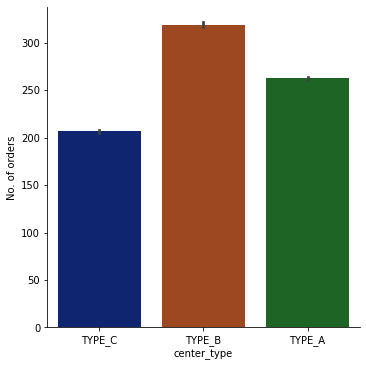

In [13]:
#visualise the trend of center_type with no.of orders
cen = sns.catplot(
    data=main_train, kind="bar",
    x="center_type", y="num_orders",
     palette="dark"
)

cen.set_axis_labels("center_type", "No. of orders")

**Center Type_B has highest number of orders for the meal followed by
Type_A and Type_C.So,Type_B must accumulate most items ***

<AxesSubplot:xlabel='cuisine', ylabel='num_orders'>

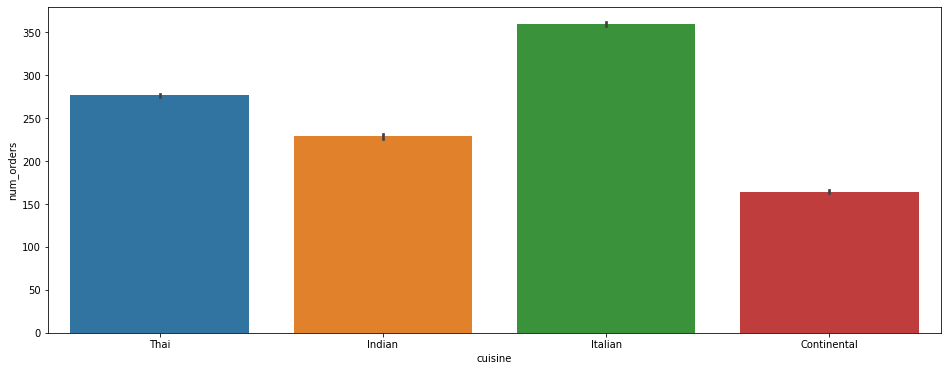

In [14]:
#cusine vs num of orders
plt.figure(figsize=(16, 6))
sns.barplot(main_train['cuisine'],main_train['num_orders'])

#### **Italian Cusine is preferred over other Cuisines.Continental is ordered the least of all**


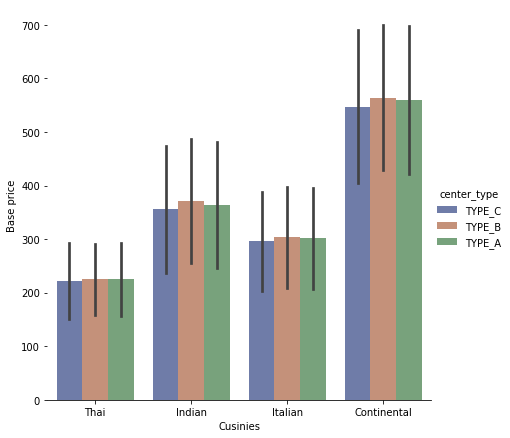

In [15]:
#base price vs cusinie
y = sns.catplot(
    data=main_train, kind="bar",
    x="cuisine", y="base_price", hue="center_type",
    ci="sd", palette="dark", alpha=.6, height=6
)
y.despine(left=True)
y.set_axis_labels("Cusinies", "Base price ")

#### Continental of each Type has high Base Price which adds to more income of the stores.

<AxesSubplot:xlabel='week', ylabel='num_orders'>

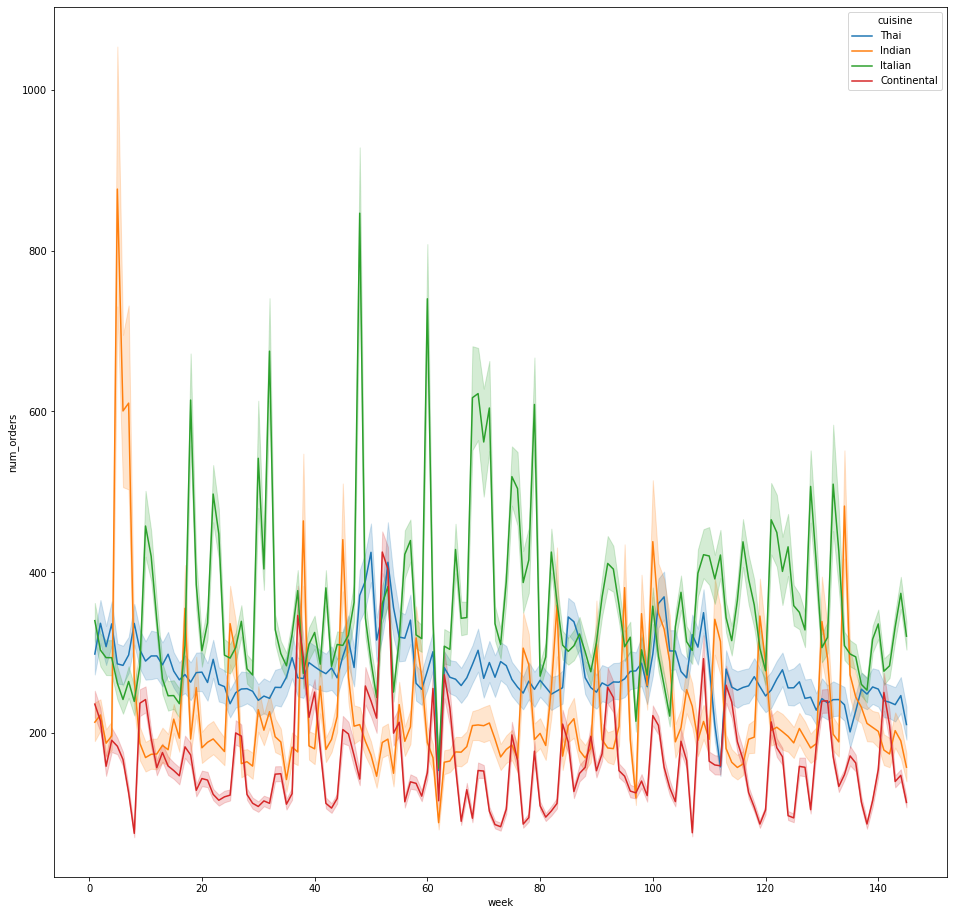

In [16]:
plt.figure(figsize=(16, 16))
sns.lineplot(x="week", y="num_orders", data=main_train, hue="cuisine")

#### There is a high demand of Indian during first few weeks.Italian has a very conistent demand over the period.Continental is of least demand as it has high base price .Thai has average to moderate demand


<AxesSubplot:>

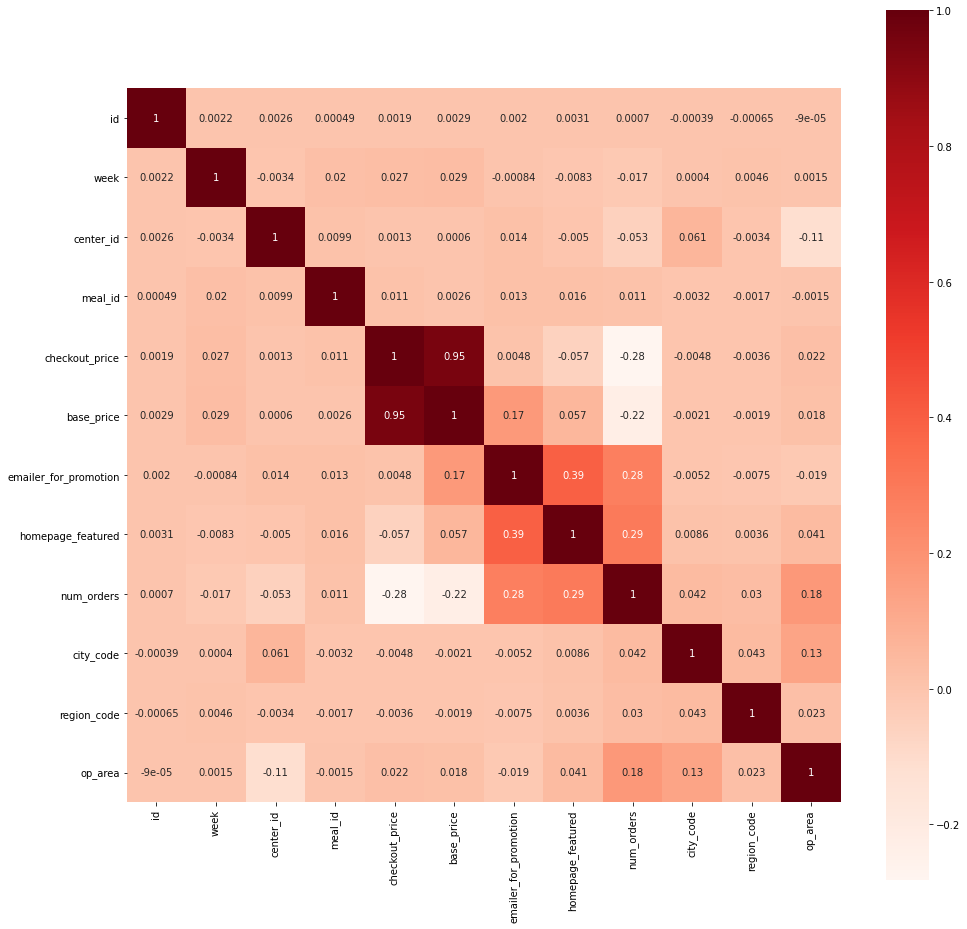

In [17]:
#checking the corelation of columns with target column
plt.figure(figsize=(16, 16))
sns.heatmap(main_train.corr(),annot=True,square=True,cmap='Reds')

**Base Price and Checkout Price is highly co-related to each other.So,we can drop one and use other.As id column is a unique column so it can be dropped as it wont give necessary information**

<AxesSubplot:xlabel='num_orders', ylabel='Density'>

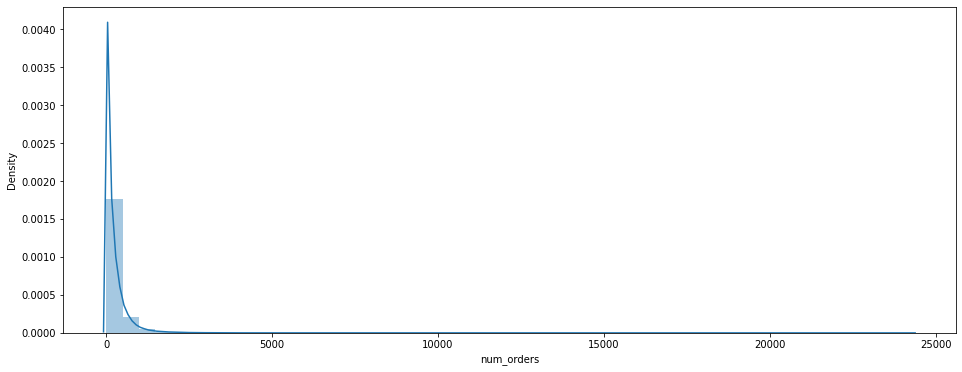

In [18]:
#checking skewness of num_orders using distplot
plt.figure(figsize=(16, 6))
sns.distplot(main_train['num_orders'])

**The Target Column “No. of Orders ” is right skeweed.It may be because of the outliers present  .The skewness can be decreased by log transforming it**


<AxesSubplot:xlabel='num_orders'>

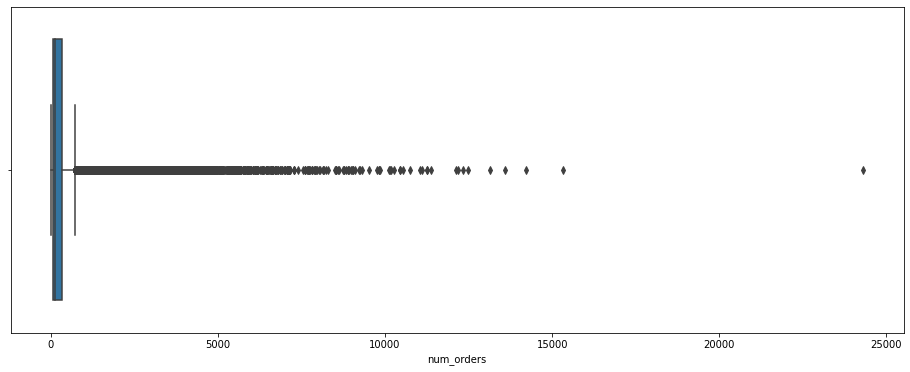

In [19]:
#checking outliers on target column using boxplot
plt.figure(figsize=(16, 6))
sns.boxplot(main_train['num_orders'])

#### boxplot on target variable shows the amount of outliers.It might give inferences

<AxesSubplot:xlabel='base_price'>

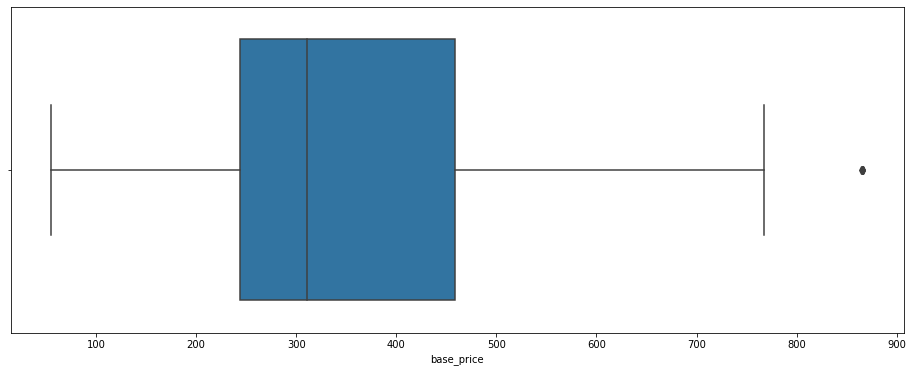

In [20]:
#outlier on base price using boxplot
plt.figure(figsize=(16, 6))
sns.boxplot(main_train['base_price'])

#### spliting into train and validation

In [94]:
#As we have to predict the last ten weeks num of orders ,so spliting the rows on basis of week
datay=main_train.copy()
df_train=datay[datay['week'].isin(range(1,136))]
df_val=datay[datay['week'].isin(range(136,145))]

### Feature Engineering

In [95]:
#making feature by joining  city_code and region_code 
df_train['city_region_join'] = df_train['city_code'].astype('str') + '_' +df_train['region_code'].astype('str')
         
        
df_val['city_region_join'] = df_val['city_code'].astype('str') + '_' + df_val['region_code'].astype('str')
        
        

In [96]:
#finding the difference between base_price and checkout_price and making a new feature
df_train['price_difference'] = (df_train['base_price'] - df_train['checkout_price']) 
         
        
df_val['price_difference'] = (df_val['base_price'] - df_val['checkout_price']) 
         
    

In [97]:
 #adding the emailer_for_promotion and homepage_featured to make new feature
df_train['email_homepage'] = df_train['emailer_for_promotion'] +df_train['homepage_featured']
         
        
df_val['email_homepage'] = df_val['emailer_for_promotion'] +df_val['homepage_featured']
         
    

In [98]:
# Label encode categorical columns for use in models.
label_encode_columns = ['center_id', 'meal_id','city_code', 'region_code',  'city_region_join', 
                        'center_type',  'category', 'cuisine']
                                                
lenc = preprocessing.LabelEncoder()
for col in label_encode_columns:
    lenc.fit(df_train[col])
    df_train[col + '_encoded'] = lenc.transform(df_train[col])
    df_val[col + '_encoded'] = lenc.transform(df_val[col])
    

In [99]:
#creating categorical and numerical column

categorical_columns = ['email_homepage', 'city_region_join_encoded','center_type_encoded',
                       'category_encoded',
                       'cuisine_encoded','center_id_encoded', 'meal_id_encoded']


numerical_columns = ['week','base_price','price_difference','op_area']
                      
                    

In [100]:
#creating series of target column
y_match=df_val['num_orders']

In [101]:
#log transforming the target column for train and validation to reduce skewness
#using log1p beacuse If your data contains zeroes,
#then you probably don't want to use log since it's undefined at zero.
df_train['num_orders_log'] = np.log1p(df_train['num_orders'])

df_val['num_orders_log'] = np.log1p(df_val['num_orders'])

In [102]:
#creating X_train with categorical and numerical columns for train
X_train = df_train[categorical_columns + numerical_columns]
y_train = df_train['num_orders_log']


In [103]:
X_train

,email_homepage,city_region_join_encoded,center_type_encoded,category_encoded,cuisine_encoded,center_id_encoded,meal_id_encoded,week,base_price,price_difference,op_area
0,0,30,2,0,3,23,22,1,152.29,15.46,2.0
1,0,30,2,0,3,23,22,2,152.29,16.46,2.0
2,0,30,2,0,3,23,22,3,133.92,1.00,2.0
3,0,30,2,0,3,23,22,4,134.86,-1.00,2.0
4,0,30,2,0,3,23,22,5,147.50,1.00,2.0
...,...,...,...,...,...,...,...,...,...,...,...
456533,1,2,0,4,0,27,27,131,630.53,185.24,4.5
456534,1,2,0,4,0,27,27,132,630.53,195.00,4.5
456535,1,2,0,4,0,27,27,133,630.53,29.10,4.5
456536,1,2,0,4,0,27,27,134,631.53,31.10,4.5


In [104]:
#creating X_train with categorical and numerical columns for validation
X_val = df_val[categorical_columns + numerical_columns]
y_val = df_val['num_orders_log']

In [105]:
X_val

,email_homepage,city_region_join_encoded,center_type_encoded,category_encoded,cuisine_encoded,center_id_encoded,meal_id_encoded,week,base_price,price_difference,op_area
135,0,30,2,0,3,23,22,136,148.44,0.0,2.0
136,0,30,2,0,3,23,22,137,154.29,1.0,2.0
137,0,30,2,0,3,23,22,138,156.23,1.0,2.0
138,0,30,2,0,3,23,22,139,152.35,2.0,2.0
139,0,30,2,0,3,23,22,140,150.35,-1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
456543,1,2,0,4,0,27,27,141,630.53,47.5,4.5
456544,0,2,0,4,0,27,27,142,582.03,1.0,4.5
456545,0,2,0,4,0,27,27,143,581.03,-2.0,4.5
456546,0,2,0,4,0,27,27,144,581.03,-1.0,4.5


### Feature Selection

##### base_price and checkout_price are highly co-related so dropped,checkout_price

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

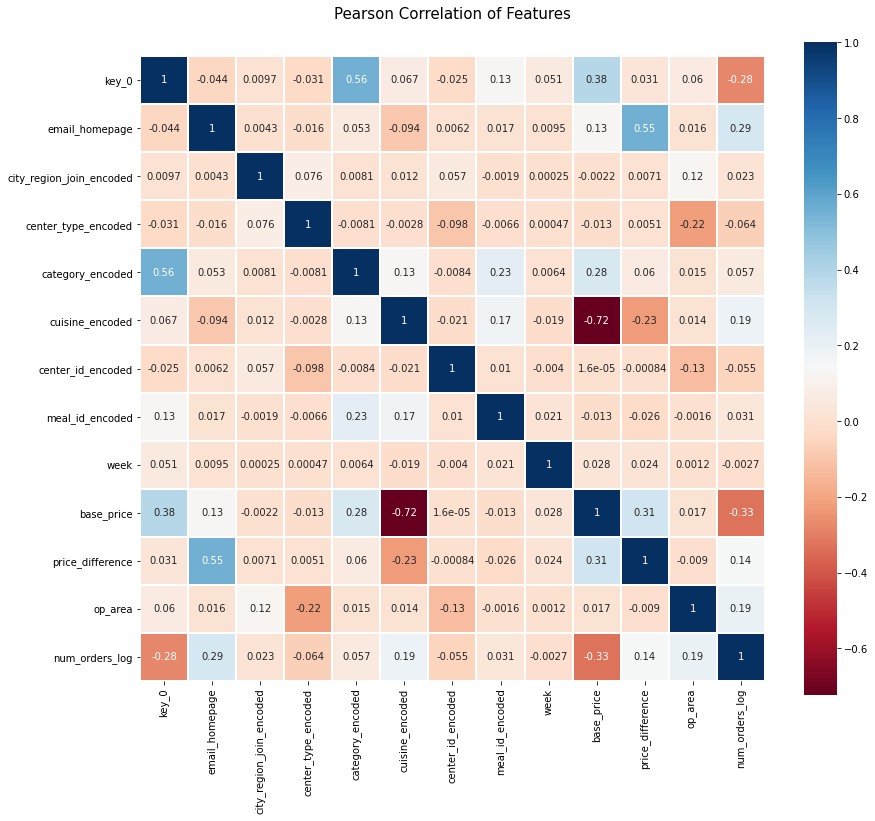

In [106]:
#Heatmap to find relation between features
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [107]:
#variance thresold for constant columns
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.0)
sel.fit(X_train)
VarianceThreshold(threshold=0.0)
sel.variances_

array([2.43120293e-01, 5.00000000e+01, 6.66457197e-01, 1.30000000e+01,
       1.21389019e+00, 7.60000000e+01, 5.00000000e+01, 1.34000000e+02,
       8.10920000e+02, 7.46900000e+02, 1.19116678e+00])

### Model Creation

In [108]:
#importing libraries for model builidng
from sklearn.datasets import make_regression
from catboost import CatBoostRegressor
import catboost as cb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
import datetime
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error
!pip install catboost

### The Metric being used in Model Testing is -
### RMSLE: Root Mean Squared Log  Error (RMSLE) is a standard way to measure the error in Regression Problems. RMSLE is usually used when you don't want to penalize huge differences in the predicted and the actual values when both predicted and true values are huge numbers.

### Linear Model 

#### Linear Regression

In [114]:
#performing linear regression 
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
#linear regression on validation data
linear_model.fit(X_train, y_train)
predicted = linear_model.predict(X_val)

In [115]:
 #rmlse
#taking exponent of prediction to get back to normal values
predicted = np.expm1(predicted)
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_match, predicted)))

RMSLE: 97.62878932524069


### Tree Based Model

#### Decision Tree Regressor

In [116]:
#DecisionTreeRegressor Model
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
DT.fit(X_train, y_train)
#prediction on validation set
DT_pred = DT.predict(X_val)
#calculating R2 score and RMLSE
from sklearn import metrics
print(f'R^2 score for train:', {DT.score(X_train, y_train)})
print(f'R^2 score for validation:', {DT.score(X_val,y_val)})
#taking exponent of prediction to get back to normal values
DT_pred = np.expm1(DT_pred)
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_match, DT_pred)))

R^2 score for train: {1.0}
R^2 score for validation: {0.5768604580882017}
RMSLE: 74.75025247083946


#### Random Forest Regressor

In [117]:
#RandomForestRegressor model
from sklearn.ensemble import RandomForestRegressor

regresson_model = RandomForestRegressor(n_estimators = 100, random_state = 42)

regresson_model.fit(X_train, y_train)
#prediction on validation set
RR_predicted = regresson_model.predict(X_val)
#calculating R2 score and RMLSE
print(f'R^2 score for train:', {regresson_model.score(X_train, y_train)})
print(f'R^2 score for validation:', {regresson_model.score(X_val,y_val)})
#taking exponent of prediction to get back to normal values
RR_predicted = np.expm1(RR_predicted)
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_match, RR_predicted)))

R^2 score for train: {0.9783013563397389}
R^2 score for validation: {0.766942685114093}
RMSLE: 55.47562800702123


### Gradient Boosting Models

#### XGradient Boosting Regressor

In [118]:
#XGBRegressor model
from xgboost import XGBRegressor
z={'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 1500, 'nthread': 4, 'objective': 'reg:squarederror',  'subsample': 0.7}
XG = XGBRegressor(**z)
XG.fit(X_train, y_train)
#prediction on validation set
y_pred = XG.predict(X_val) 
#calculating R2 score and RMLSE
from sklearn import metrics 
#taking exponent of prediction to get back to normal values
y_pred = np.expm1(y_pred)
print(f'R^2 score for train:', {XG.score(X_train, y_train)})
print(f'R^2 score for validation:', {XG.score(X_val,y_val)})
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_match, y_pred)))

R^2 score for train: {0.841169160987338}
R^2 score for validation: {0.7824030376873445}
RMSLE: 53.60400909255012


#### Cat Boost Regressor

In [119]:
#CatBoostRegressor model
CGB=CatBoostRegressor(learning_rate=0.04,loss_function='RMSE',max_depth=9,verbose=False)

CGB.fit(X_train, y_train)
#prediction on validation set
CGBpred=CGB.predict(X_val)
#calculating R2 score and RMLSE
from sklearn import metrics 
#taking exponent of prediction to get back to normal values
CGBpred = np.expm1(CGBpred)

print(f'R^2 score for train:', {CGB.score(X_train, y_train)})
print(f'R^2 score for validation:', {CGB.score(X_val,y_val)})
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_match, CGBpred)))

R^2 score for train: {0.8403488827875729}
R^2 score for validation: {0.7879026596348675}
RMSLE: 52.9222706370535


In [120]:
#comparing actual and predicted values
pd.DataFrame(zip(CGBpred , y_match),columns=['Predicted','Actuals'])

,Predicted,Actuals
0,247.024196,134
1,212.278866,96
2,209.370000,81
3,243.298849,67
4,246.786292,204
...,...,...
32816,74.578712,13
32817,42.670198,42
32818,43.348567,40
32819,43.341817,53


#### Light GBM Regressor

In [121]:
LGB=LGBMRegressor(colsample_bytree= 0.4,
     min_child_samples=5,
     num_leaves= 200,learning_rate=0.05,
                          n_estimators=500)

LGB.fit(X_train, y_train)
LGBpred=LGB.predict(X_val)
LGBpred = np.expm1(LGBpred)
print(f'R^2 score for train:', {LGB.score(X_train, y_train)})
print(f'R^2 score for validation:', {LGB.score(X_val,y_val)})
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_match, LGBpred)))

R^2 score for train: {0.8584334806794855}
R^2 score for validation: {0.7997358199072169}
RMSLE: 51.424786405500456


In [122]:
#comparing actual and predicted values
pd.DataFrame(zip(LGBpred , y_match),columns=['Predicted','Actuals'])

,Predicted,Actuals
0,180.547184,134
1,155.628271,96
2,164.045085,81
3,165.619525,67
4,177.843069,204
...,...,...
32816,85.460047,13
32817,42.042990,42
32818,41.962413,40
32819,41.962413,53


## GRID SEARCH CV to find best  hyperparameters for models 

In [76]:
#GRID SEARCH CV WITH CATBOOST
model_CBR = CatBoostRegressor()
parameters = {'depth'         : [6,8,10],
                  'learning_rate' : [0.01, 0.05, 0.1,0.04],
                  'iterations'    : [30, 50, 100]
                 }
grid = GridSearchCV(estimator=model_CBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid.fit(X_train, y_train)
from sklearn import metrics 
y_pred = grid.predict(X_val) 
y_pred = np.expm1(y_pred)
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_match, y_pred)))
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n", grid.best_estimator_)
print("\n The best score across ALL searched params:\n", grid.best_score_)
print("\n The best parameters across ALL searched params:\n", grid.best_params_)

0:	learn: 1.1706687	total: 89.2ms	remaining: 8.83s
1:	learn: 1.1365175	total: 156ms	remaining: 7.63s
2:	learn: 1.1049445	total: 222ms	remaining: 7.17s
3:	learn: 1.0755538	total: 288ms	remaining: 6.92s
4:	learn: 1.0482308	total: 355ms	remaining: 6.74s
5:	learn: 1.0227275	total: 422ms	remaining: 6.61s
6:	learn: 0.9989675	total: 487ms	remaining: 6.47s
7:	learn: 0.9770490	total: 553ms	remaining: 6.36s
8:	learn: 0.9564868	total: 621ms	remaining: 6.28s
9:	learn: 0.9377510	total: 688ms	remaining: 6.19s
10:	learn: 0.9201851	total: 752ms	remaining: 6.09s
11:	learn: 0.9037981	total: 818ms	remaining: 6s
12:	learn: 0.8893947	total: 883ms	remaining: 5.91s
13:	learn: 0.8752293	total: 945ms	remaining: 5.8s
14:	learn: 0.8621523	total: 1.01s	remaining: 5.71s
15:	learn: 0.8501001	total: 1.07s	remaining: 5.62s
16:	learn: 0.8382989	total: 1.14s	remaining: 5.54s
17:	learn: 0.8280023	total: 1.2s	remaining: 5.45s
18:	learn: 0.8175307	total: 1.26s	remaining: 5.38s
19:	learn: 0.8087791	total: 1.32s	remaining: 

In [123]:
#GRID SEARCH CV WITH XGB REFRESSOR 
xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], # value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train,
         y_train)
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  18 out of  18 | elapsed: 15.7min finished


[17:24:22] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[17:24:22] WARNING: ../src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


-0.052389609941282
{'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [125]:
# making comparison dataframe for different rmlse with different models
models = {
    'Models' : ['LinearRegression', 'DecisionTreeRegressor', 'RandomForestRegressor', 'XGBRregressor',
               'CatBoostRegressor','LGBMRegressor'],
    'RMLSE' : [97.62878932524069, 74.75025247083946, 55.47562800702123, 53.60400909255012,
               52.9222706370535,51.424786405500456
              ],
    
}
  
# creating a Dataframe object 
model_df = pd.DataFrame(models)

In [126]:
#sorting the models based on Least RMLSE Values
print(model_df.sort_values(by=['RMLSE'],ascending=True))

                  Models      RMLSE
5          LGBMRegressor  51.424786
4      CatBoostRegressor  52.922271
3          XGBRregressor  53.604009
2  RandomForestRegressor  55.475628
1  DecisionTreeRegressor  74.750252
0       LinearRegression  97.628789


**RMLSE of LGBMRegressor is the least .So taking it to predict on test dataset.<br>
Linear Models like Linear Regression did not perform upto the mark<br>
Tree Models gave better results but GBModels outperformed them ****


## Prediction on test data

In [21]:
#importing test data
df_test=pd.read_csv("../input/testing/test_QoiMO9B.csv")
df_fulf=pd.read_csv("../input/mealee/fulfilment_center_info.csv")
df_meal=pd.read_csv("../input/mealee/meal_info.csv")

In [22]:
#merging fulfilment_center_info dataframe with test dataframe
dfx=pd.merge(df_test, df_fulf, on = "center_id", how = "inner")
dfx

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area
0,1028232,146,55,1885,158.11,159.11,0,0,647,56,TYPE_C,2.0
1,1127204,146,55,1993,160.11,159.11,0,0,647,56,TYPE_C,2.0
2,1212707,146,55,2539,157.14,159.14,0,0,647,56,TYPE_C,2.0
3,1082698,146,55,2631,162.02,162.02,0,0,647,56,TYPE_C,2.0
4,1400926,146,55,1248,163.93,163.93,0,0,647,56,TYPE_C,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
32568,1250239,155,61,1543,482.09,484.09,0,0,473,77,TYPE_A,4.5
32569,1039516,155,61,2304,483.09,483.09,0,0,473,77,TYPE_A,4.5
32570,1158107,155,61,2664,322.07,323.07,0,0,473,77,TYPE_A,4.5
32571,1444235,155,61,2569,322.07,323.07,0,0,473,77,TYPE_A,4.5


In [23]:
#merging meal_id  dataframe with test dataframe
main_test=pd.merge(dfx, df_meal, on = "meal_id", how = "inner")
main_test

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine
0,1028232,146,55,1885,158.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
1,1262649,147,55,1885,159.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
2,1453211,149,55,1885,157.14,158.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai
3,1262599,150,55,1885,159.14,157.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai
4,1495848,151,55,1885,160.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32568,1412025,146,61,2104,583.03,581.03,0,0,473,77,TYPE_A,4.5,Fish,Continental
32569,1287019,147,61,2104,582.03,582.03,0,1,473,77,TYPE_A,4.5,Fish,Continental
32570,1396176,149,61,2104,629.53,629.53,0,0,473,77,TYPE_A,4.5,Fish,Continental
32571,1331977,150,61,2104,629.53,629.53,0,0,473,77,TYPE_A,4.5,Fish,Continental


In [24]:
#copying test dataset to df_test 
df_test=main_test.copy()

In [ ]:
#making feature by joining  city_code and region_code 
df_test['city_region_join'] =  df_test['city_code'].astype('str') + '_' +  df_test['region_code'].astype('str')

# Joining email and homepage features into a single feature
df_test['email_homepage'] =   df_test['emailer_for_promotion'] + df_test['homepage_featured']

#making change in price percentage by using base_price and checkout_price
df_test['price_difference'] = (df_test['base_price'] - df_test['checkout_price']) 

In [ ]:
# Label encode categorical columns
label_encode_columns = ['center_id', 'meal_id','city_code', 'region_code',  'city_region_join', 
                        'center_type',  'category', 'cuisine']
for col in label_encode_columns:
    df_test[col + '_encoded'] = lenc.transform(df_test[col])

In [ ]:
#creating categorical and numerical column

categorical_columns = ['email_homepage', 'city_region_join_encoded','center_type_encoded',
                       'category_encoded',
                       'cuisine_encoded','center_id_encoded', 'meal_id_encoded']


numerical_columns = ['week','base_price','price_difference','op_area']

In [127]:
#creating test dataset ,joining numerical and categorical columns
X_test = df_test[categorical_columns + numerical_columns]

In [128]:
#prediction using LGB Regressor,this gives the least RMLSE on test data
pred = LGB.predict(X_test)
#taking exponent of prediction to get back to normal values
pred = np.expm1(pred)

submission_df = dfxt.copy()
submission_df['num_orders'] = pred
submission_df = submission_df[['id', 'num_orders']]
#creating csv
submission_df.to_csv('submissionlgb.csv', index=False)

In [2]:
#Prediction has been done.Thank You

In [3]:
#Analytics Vidhya gave a RMLSE of 53.7897 on test data

# RMLSE for test data is 53.7897